# Create your first wordcloud


In this first chapter of the Intro to NLP course, you learn how to load a page from wikipedia and create a wordcloud.

Let's start by installing the [wordcloud](https://github.com/amueller/word_cloud) library

In [2]:
!pip install wordcloud

# Content from wikipedia

Wikipedia is a great source of quality text.
We use the Wikipedia API to get the text of a page given its title


In [3]:
# 1) import the necessary library
import requests

# 2) set the title of the page (uncomment to change the page)
title = 'İspanyolca'

# 3) send a request to the wikipedia api
# asking to return content of the page formatted as json

response = requests.get(
    'https://tr.wikipedia.org/w/api.php',
    params={
        'action': 'query',
        'format': 'json',
        'titles': title,
        'prop': 'extracts',
        'explaintext': True,
    }).json()

# 4) Parse the result and extract the text
page = next(iter(response['query']['pages'].values()))
text = page['extract']


In [4]:
# print the 1st 300 characters from the text
print(text[:10000])

İspanyolca ya da Kastilya dili (İspanyolca: español veya castellano), Romen dillerinden biri. Kökeni İspanya'nın Kastilya bölgesine dayanır. 480 milyona yakın kişinin ana dili olarak konuştuğu İspanyolca, ana dil olarak Çinceden sonra en çok konuşulan ikinci dildir. En çok konuşulan diller sıralamasında ise İngilizce, Çince ve Hintçe dilinden sonra dördüncü sıradadır. İnternette ise İngilizce ve Çince'den sonra  en çok kullanılan üçüncü dildir. İspanyolca, Portekizce ve Katalanca ile birlikte, Latin dillerinin güneybatı kolunu temsil eden üç dilden biridir.


== Konuşulduğu coğrafya ==
Günümüzde dünyada 470 milyon ila 500 milyon kişinin İspanyolca konuştuğu tahmin edilmektedir.İspanyolca dünyada en çok ülkede resmî dil olarak kabul edilen dildir. Resmî dil olarak İspanyolcayı kullanan ülkeler: İspanya, Küba, Arjantin, Bolivya, Kolombiya, Kosta Rika, Şili, Ekvador, Guatemala, Ekvator Ginesi, Honduras, Meksika, Nikaragua, Panama, Paraguay, Peru, Porto Riko, Dominik Cumhuriyeti, El Salvad

Let's wrap the code to get text from wikipedia into a convenient function

In [5]:
import requests

def wikipedia_page(title):
    '''
    This function returns the raw text of a wikipedia page
    given a wikipedia page title
    '''
    params = {
        'action': 'query',
        'format': 'json', # request json formatted content
        'titles': title, # title of the wikipedia page
        'prop': 'extracts',
        'explaintext': True
    }
    # send a request to the wikipedia api
    response = requests.get(
         'https://tr.wikipedia.org/w/api.php',
         params= params
     ).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))
    # return the page content
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"



In [6]:
# We lowercase the text to avoid having to deal with uppercase and capitalized words
text = wikipedia_page('İspanyolca').lower()
print(text)

i̇spanyolca ya da kastilya dili (i̇spanyolca: español veya castellano), romen dillerinden biri. kökeni i̇spanya'nın kastilya bölgesine dayanır. 480 milyona yakın kişinin ana dili olarak konuştuğu i̇spanyolca, ana dil olarak çinceden sonra en çok konuşulan ikinci dildir. en çok konuşulan diller sıralamasında ise i̇ngilizce, çince ve hintçe dilinden sonra dördüncü sıradadır. i̇nternette ise i̇ngilizce ve çince'den sonra  en çok kullanılan üçüncü dildir. i̇spanyolca, portekizce ve katalanca ile birlikte, latin dillerinin güneybatı kolunu temsil eden üç dilden biridir.


== konuşulduğu coğrafya ==
günümüzde dünyada 470 milyon ila 500 milyon kişinin i̇spanyolca konuştuğu tahmin edilmektedir.i̇spanyolca dünyada en çok ülkede resmî dil olarak kabul edilen dildir. resmî dil olarak i̇spanyolcayı kullanan ülkeler: i̇spanya, küba, arjantin, bolivya, kolombiya, kosta rika, şili, ekvador, guatemala, ekvator ginesi, honduras, meksika, nikaragua, panama, paraguay, peru, porto riko, dominik cumhuriyet

# Create a wordcloud
We use the [wordcloud](https://github.com/amueller/word_cloud) library.

Modify the parameters to get different results (size, max_words, ...)

The Wordcloud library comes with its own list of stopwords. To disable it we set the list of stopwords to be empty.

            stopwords = []

In [7]:
stopwords = []

# import the wordcloud library
from wordcloud import WordCloud
# Instantiate a new wordcloud.
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = False,
        width = 600,
        height= 300,
        max_words = 300
       )

# Apply the wordcloud to the text.
wordcloud.generate(text)

We use matplotlib to display the word cloud as an image:

(-0.5, 599.5, 299.5, -0.5)

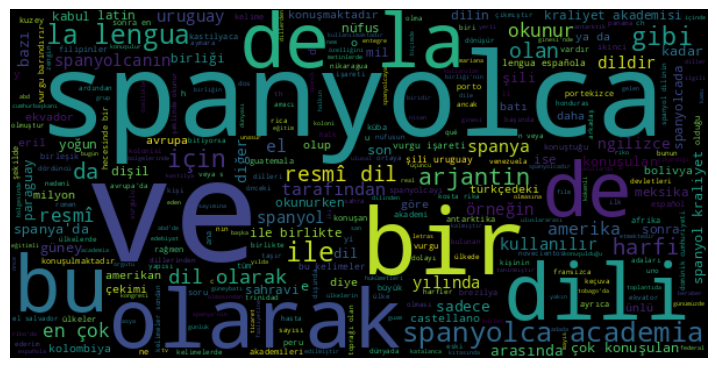

In [8]:
import matplotlib.pyplot as plt
# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")

We mostly see stopwords: _the_  _of_  _by_ _in_ etc ...

To get rid of these stopwords, we build a new wordcloud, this time without setting the stopword parameter to an empty list.

(-0.5, 799.5, 399.5, -0.5)

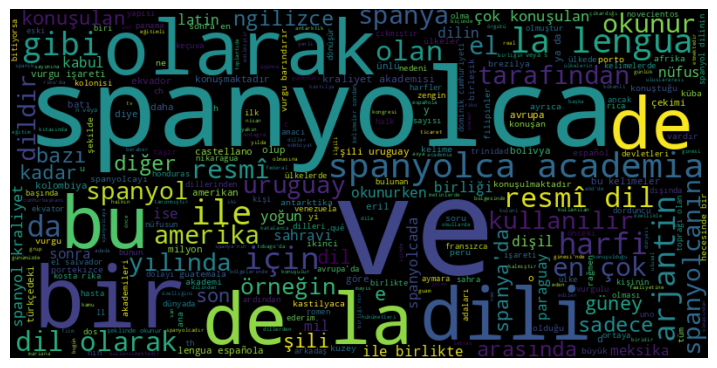

In [9]:
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = False,
        width = 800,
        height= 400,
        max_words = 300)
wordcloud.generate(text)
# plot
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

A wordcloud which is much more representative of the Earth wikipedia page.

Let's see what we get for another page, ... for instance [New York](https://en.wikipedia.org/wiki/New_York)

(-0.5, 799.5, 399.5, -0.5)

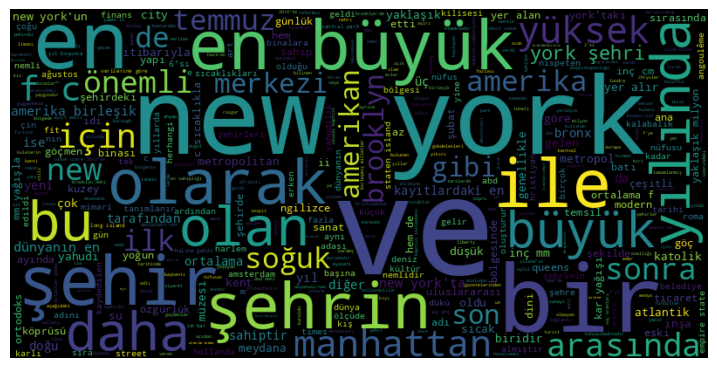

In [10]:
# Text
text = wikipedia_page('New_York').lower()
# Wordcloud
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = False,
        width = 800,
        height= 400,
        max_words = 400)
wordcloud.generate(text)
# plot
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Change Background and Make a mask!


You get the gist :)

# Gutenberg project

The [Gutenberg project](https://www.gutenberg.org) is another great source of text.


In [11]:
import requests
# this is the url for Frankenstein, by Mary Wollstonecraft Shelley
frankenstein_url = 'https://www.gutenberg.org/files/84/84-0.txt'

# this is the url for Alice in Wonderland by Lewis Carroll
alice_url = 'http://www.gutenberg.org/files/11/11-0.txt'

# get the text from Alice in Wonderland
r = requests.get(alice_url)

# remove the header, the footer and some weird characters
text = ' '.join(r.text.split('***')[1:])
text = text.split("END OF THE PROJECT GUTENBERG")[0]
text = text.encode('ascii',errors='ignore').decode('utf-8')
print(text)

 START OF THE PROJECT GUTENBERG EBOOK ALICES ADVENTURES IN WONDERLAND  

[Illustration]




Alices Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queens Croquet-Ground
 CHAPTER IX.    The Mock Turtles Story
 CHAPTER X.     The Lobster Quadrille
 CHAPTER XI.    Who Stole the Tarts?
 CHAPTER XII.   Alices Evidence




CHAPTER I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, and what is the use of a book, thought Alice
without pictures or conversations?

So she was co

(-0.5, 799.5, 399.5, -0.5)

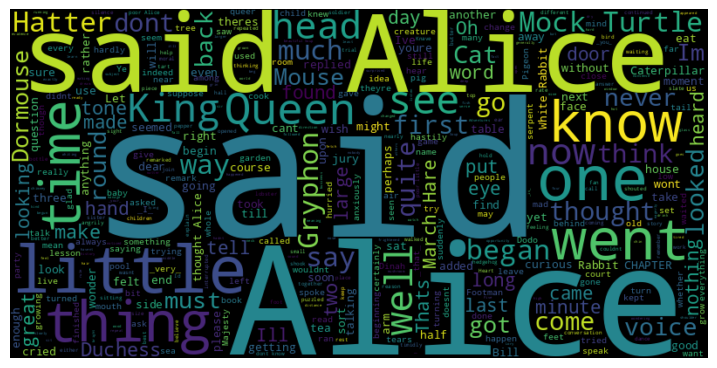

In [12]:

# Wordcloud
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = True,
        width = 800,
        height= 400,
        max_words = 400)
wordcloud.generate(text)
# plot
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [13]:
# and the Frankenstein Wordcloud

import requests
# this is the url for Frankenstein, by Mary Wollstonecraft Shelley
frankenstein_url = 'https://www.gutenberg.org/files/84/84-0.txt'

# get the text from Alice in Wonderland
r = requests.get(frankenstein_url)

# remove the header, the footer and some weird characters
text = ' '.join(r.text.split('***')[1:])
text = text.split("END OF THE PROJECT GUTENBERG")[0]
text = text.encode('ascii',errors='ignore').decode('utf-8')
print(text)

 START OF THE PROJECT GUTENBERG EBOOK FRANKENSTEIN  




Frankenstein;

or, the Modern Prometheus

by Mary Wollstonecraft (Godwin) Shelley


 CONTENTS

 Letter 1
 Letter 2
 Letter 3
 Letter 4
 Chapter 1
 Chapter 2
 Chapter 3
 Chapter 4
 Chapter 5
 Chapter 6
 Chapter 7
 Chapter 8
 Chapter 9
 Chapter 10
 Chapter 11
 Chapter 12
 Chapter 13
 Chapter 14
 Chapter 15
 Chapter 16
 Chapter 17
 Chapter 18
 Chapter 19
 Chapter 20
 Chapter 21
 Chapter 22
 Chapter 23
 Chapter 24




Letter 1

_To Mrs. Saville, England._


St. Petersburgh, Dec. 11th, 17.


You will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings. I arrived here yesterday, and my first task is to assure
my dear sister of my welfare and increasing confidence in the success
of my undertaking.

I am already far north of London, and as I walk in the streets of
Petersburgh, I feel a cold northern breeze play upon my cheeks, which
braces my nerves and fil

(-0.5, 799.5, 399.5, -0.5)

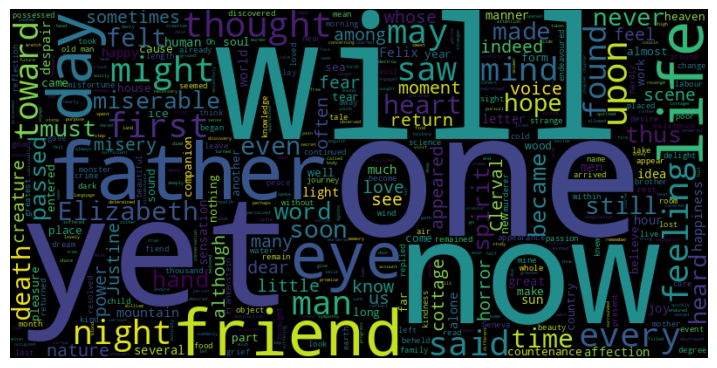

In [14]:
# Wordcloud
wordcloud = WordCloud(
        random_state = 8,
        normalize_plurals = True,
        width = 800,
        height= 400,
        max_words = 400)
wordcloud.generate(text)
# plot
fig, ax = plt.subplots(1,1, figsize = (9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")